In [1]:
import random
import math
import matplotlib.pyplot as plt

In [11]:
# Generate Samples
def generate_samples(n):
    return [random.uniform(0, 2) for _ in range(n)]

evaluation_points = [i / 100.0 for i in range(200)]
true_pdf = [0.5 if 0 < x < 2 else 0 for x in evaluation_points]

In [12]:
# Kernel
def gaussian_kernel(x, xi, vn):
    # standard normal distribution
    return (1 / (vn * math.sqrt(2 * math.pi))) * math.exp(-(x - xi)**2 / (2 * vn**2))

In [13]:
def parzen_window_estimation(points, samples, vn):
    estimates = []
    for point in points:
        kernel_sum = sum(gaussian_kernel(point, xi, vn) for xi in samples)
        estimates.append(kernel_sum / len(samples))
    return estimates

In [14]:
n_samples = [32, 256, 5000]
vn_values = [0.05, 0.2]
Results = {}
sample_points = {}

In [15]:
for vn in vn_values:
    for n in n_samples:
        samples = generate_samples(n)
        sample_points[(vn, n)] = samples
        estimates = parzen_window_estimation(evaluation_points, samples, vn)
        Results[(vn, n)] = Results

In [20]:
#Plot Function
def plot_density_estimates(vn, n, true_pdf, estimated_pdf, evaluation_points):
    plt.plot(evaluation_points, true_pdf, label='True PDF', color='red')
    plt.plot(evaluation_points, estimated_pdf, label=f'Estimated PDF (VN={vn}, N={n})', color='blue')
    plt.title(f'Estimation With VN={vn}, N={n}')
    plt.show()

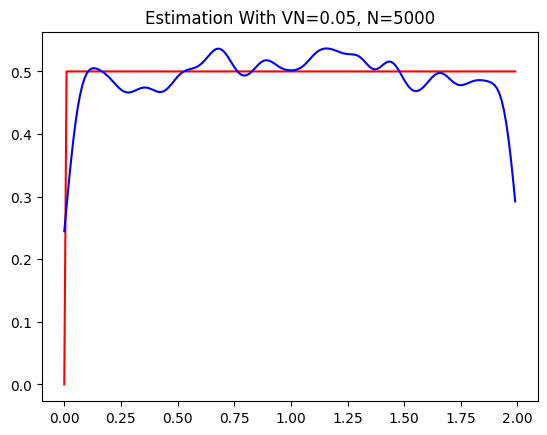

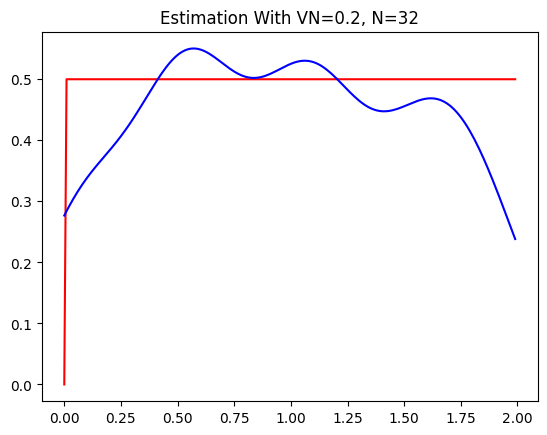

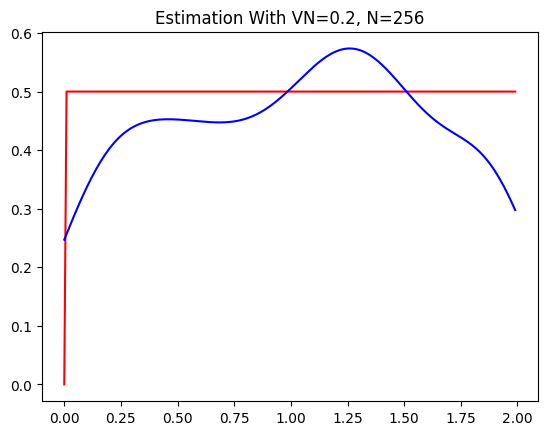

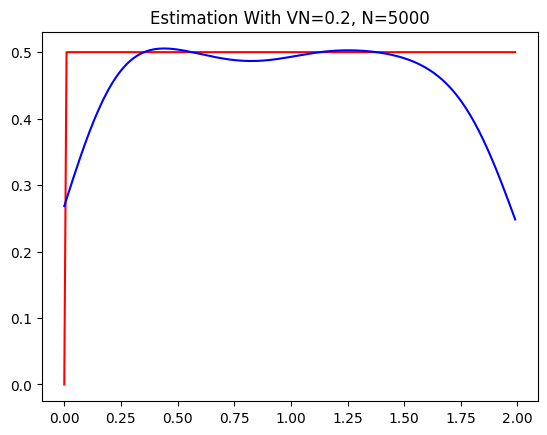

In [21]:
for vn in vn_values:
    for n in n_samples:
        plot_density_estimates(vn, n, true_pdf, density_estimates[(vn, n)], evaluation_points)